In [463]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from bokeh.plotting import figure, show, output_file, curdoc
from bokeh.models import ColumnDataSource, HoverTool,Select, Slider
from bokeh.layouts import column,row
from bokeh.io import output_notebook
from bokeh.transform import factor_cmap
from bokeh.palettes import Category10, Category20
from bokeh.models import ColorBar, LinearColorMapper, BasicTicker, PrintfTickFormatter
from bokeh.transform import transform


In [637]:
df = pd.read_csv('data/train.csv')

In [638]:
columns_explanation = {
    "SalePrice":"Sale price",
    "MSSubClass": "Identifies the type of dwelling involved in the sale, categorized by construction age and style: 20 (1-STORY 1946 & NEWER), 30 (1-STORY 1945 & OLDER), 40 (1-STORY W/FINISHED ATTIC), 45 (1-1/2 STORY - UNFINISHED), 50 (1-1/2 STORY FINISHED), 60 (2-STORY 1946 & NEWER), 70 (2-STORY 1945 & OLDER), 75 (2-1/2 STORY), 80 (SPLIT OR MULTI-LEVEL), 85 (SPLIT FOYER), 90 (DUPLEX), 120 (1-STORY PUD 1946 & NEWER), 150 (1-1/2 STORY PUD), 160 (2-STORY PUD 1946 & NEWER), 180 (PUD MULTILEVEL), 190 (2 FAMILY CONVERSION).",
    "MSZoning": "General zoning classification of the sale, indicating the type of land use allowed: A (Agriculture), C (Commercial), FV (Floating Village Residential), I (Industrial), RH (Residential High Density), RL (Residential Low Density), RP (Residential Low Density Park), RM (Residential Medium Density).",
    "LotFrontage": "Linear feet of street connected to property.",
    "LotArea": "Lot size in square feet.",
    "Street": "Type of road access to the property: Grvl (Gravel), Pave (Paved).",
    "Alley": "Type of alley access: Grvl (Gravel), Pave (Paved), NA (No alley access).",
    "LotShape": "General shape of the property: Reg (Regular), IR1 (Slightly Irregular), IR2 (Moderately Irregular), IR3 (Irregular).",
    "LandContour": "Flatness of the property: Lvl (Near Flat/Level), Bnk (Banked - Quick and significant rise from street grade), HLS (Hillside - Significant slope), Low (Depression).",
    "Utilities": "Type of utilities available: AllPub (All public utilities - Electricity, Gas, Water & Sewer), NoSewr (Electricity, Gas, Water - Septic Tank), NoSeWa (Electricity, Gas only), ELO (Electricity only).",
    "LotConfig": "Configuration of the lot: Inside (Inside lot), Corner (Corner lot), CulDSac (Cul-de-sac), FR2 (Frontage on 2 sides of property), FR3 (Frontage on 3 sides).",
    "LandSlope": "Slope of the property: Gtl (Gentle slope), Mod (Moderate slope), Sev (Severe slope).",
    "Neighborhood": "Physical locations within Ames city limits: Blmngtn (Bloomington Heights), Blueste (Bluestem), BrDale (Briardale), BrkSide (Brookside), ClearCr (Clear Creek), CollgCr (College Creek), Crawfor (Crawford), Edwards (Edwards), Gilbert (Gilbert), IDOTRR (Iowa DOT and Rail Road), MeadowV (Meadow Village), Mitchel (Mitchell), Names (North Ames), NoRidge (Northridge), NPkVill (Northpark Villa), NridgHt (Northridge Heights), NWAmes (Northwest Ames), OldTown (Old Town), SWISU (South & West of Iowa State University), Sawyer (Sawyer), SawyerW (Sawyer West), Somerst (Somerset), StoneBr (Stone Brook), Timber (Timberland), Veenker (Veenker).",
    "Condition1": "Proximity to various conditions: Artery (Adjacent to arterial street), Feedr (Adjacent to feeder street), Norm (Normal), RRNn (Within 200' of North-South Railroad), RRAn (Adjacent to North-South Railroad), PosN (Near positive off-site feature - park, greenbelt, etc.), PosA (Adjacent to positive off-site feature), RRNe (Within 200' of East-West Railroad), RRAe (Adjacent to East-West Railroad).",
    "Condition2": "Secondary proximity to conditions: Artery (Adjacent to arterial street), Feedr (Adjacent to feeder street), Norm (Normal), RRNn (Within 200' of North-South Railroad), RRAn (Adjacent to North-South Railroad), PosN (Near positive off-site feature - park, greenbelt, etc.), PosA (Adjacent to positive off-site feature), RRNe (Within 200' of East-West Railroad), RRAe (Adjacent to East-West Railroad).",
    "BldgType": "Type of dwelling: 1Fam (Single-family Detached), 2FmCon (Two-family Conversion), Duplx (Duplex), TwnhsE (Townhouse End Unit), TwnhsI (Townhouse Inside Unit).",
    "HouseStyle": "Style of dwelling: 1Story (One story), 1.5Fin (One and one-half story: 2nd level finished), 1.5Unf (One and one-half story: 2nd level unfinished), 2Story (Two story), 2.5Fin (Two and one-half story: 2nd level finished), 2.5Unf (Two and one-half story: 2nd level unfinished), SFoyer (Split Foyer), SLvl (Split Level).",
    "OverallQual": "Rates the overall material and finish of the house: 1 (Very Poor) to 10 (Very Excellent).",
    "OverallCond": "Rates the overall condition of the house: 1 (Very Poor) to 10 (Very Excellent).",
    "YearBuilt": "Original construction date.",
    "YearRemodAdd": "Remodel date (same as construction date if no remodeling or additions).",
    "RoofStyle": "Type of roof: Flat, Gable, Gambrel (Barn), Hip, Mansard, Shed.",
    "RoofMatl": "Roof material: ClyTile (Clay or Tile), CompShg (Standard Shingle), Membran (Membrane), Metal, Roll, Tar&Grv (Gravel & Tar), WdShake (Wood Shakes), WdShngl (Wood Shingles).",
    "Exterior1st": "Primary exterior covering on house: AsbShng (Asbestos Shingles), AsphShn (Asphalt Shingles), BrkComm (Brick Common), BrkFace (Brick Face), CBlock (Cinder Block), CemntBd (Cement Board), HdBoard (Hard Board), ImStucc (Imitation Stucco), MetalSd (Metal Siding), Other, Plywood, PreCast, Stone, Stucco, VinylSd (Vinyl Siding), Wd Sdng (Wood Siding), WdShing (Wood Shingles).",
    "Exterior2nd": "Secondary exterior covering on house: AsbShng, AsphShn, BrkComm, BrkFace, CBlock, CemntBd, HdBoard, ImStucc, MetalSd, Other, Plywood, PreCast, Stone, Stucco, VinylSd, Wd Sdng, WdShing.",
    "MasVnrType": "Masonry veneer type: BrkCmn (Brick Common), BrkFace (Brick Face), CBlock (Cinder Block), None, Stone.",
    "MasVnrArea": "Masonry veneer area in square feet.",
    "ExterQual": "Evaluates the quality of the material on the exterior: Ex (Excellent), Gd (Good), TA (Typical), Fa (Fair), Po (Poor).",
    "ExterCond": "Evaluates the present condition of the material on the exterior: Ex (Excellent), Gd (Good), TA (Typical), Fa (Fair), Po (Poor).",
    "Foundation": "Type of foundation: BrkTil (Brick & Tile), CBlock (Cinder Block), PConc (Poured Concrete), Slab, Stone, Wood.",
    "BsmtQual": "Evaluates the height of the basement: Ex (Excellent), Gd (Good), TA (Typical), Fa (Fair), Po (Poor), NA (No Basement).",
    "BsmtCond": "Evaluates the general condition of the basement: Ex (Excellent), Gd (Good), TA (Typical), Fa (Fair), Po (Poor), NA (No Basement).",
    "BsmtExposure": "Refers to walkout or garden level walls: Gd (Good Exposure), Av (Average Exposure), Mn (Minimum Exposure), No (No Exposure), NA (No Basement).",
    "BsmtFinType1": "Rating of basement finished area: GLQ (Good Living Quarters), ALQ (Average Living Quarters), BLQ (Below Average Living Quarters), Rec (Average Rec Room), LwQ (Low Quality), Unf (Unfinished), NA (No Basement).",
    "BsmtFinSF1": "Type 1 finished square feet.",
    "BsmtFinType2": "Rating of basement finished area (if multiple types): GLQ (Good Living Quarters), ALQ (Average Living Quarters), BLQ (Below Average Living Quarters), Rec (Average Rec Room), LwQ (Low Quality), Unf (Unfinished), NA (No Basement).",
    "BsmtFinSF2": "Type 2 finished square feet.",
    "BsmtUnfSF": "Unfinished square feet of basement area.",
    "TotalBsmtSF": "Total square feet of basement area.",
    "Heating": "Type of heating: Floor (Floor Furnace), GasA (Gas forced warm air furnace), GasW (Gas hot water or steam heat), Grav (Gravity furnace), OthW (Other hot water/steam heat), Wall (Wall furnace).",
    "HeatingQC": "Heating quality and condition: Ex (Excellent), Gd (Good), TA (Typical), Fa (Fair), Po (Poor).",
    "CentralAir": "Central air conditioning: Y (Yes), N (No).",
    "Electrical": "Electrical system: SBrkr (Standard Circuit Breakers & Romex), FuseA (Fuse Box over 60 AMP), FuseF (60 AMP Fuse Box), FuseP (60 AMP Fuse Box & knob & tube wiring), Mix (Mixed).",
    "1stFlrSF": "First Floor square feet.",
    "2ndFlrSF": "Second floor square feet.",
    "LowQualFinSF": "Low quality finished square feet (all floors).",
    "GrLivArea": "Above grade (ground) living area square feet.",
    "BsmtFullBath": "Basement full bathrooms.",
    "BsmtHalfBath": "Basement half bathrooms.",
    "FullBath": "Full bathrooms above grade.",
    "HalfBath": "Half baths above grade.",
    "BedroomAbvGr": "Bedrooms above grade (does NOT include basement bedrooms).",
    "KitchenAbvGr": "Kitchens above grade.",
    "KitchenQual": "Kitchen quality: Ex (Excellent), Gd (Good), TA (Typical/Average), Fa (Fair), Po (Poor).",
    "TotRmsAbvGrd": "Total rooms above grade (does not include bathrooms).",
    "Functional": "Home functionality (Assume typical unless deductions are warranted): Typ (Typical), Min1 (Minor Deductions 1), Min2 (Minor Deductions 2), Mod (Moderate Deductions), Maj1 (Major Deductions 1), Maj2 (Major Deductions 2), Sev (Severely Damaged), Sal (Salvage only).",
    "Fireplaces": "Number of fireplaces.",
    "FireplaceQu": "Fireplace quality: Ex (Excellent), Gd (Good), TA (Average), Fa (Fair), Po (Poor), NA (No Fireplace).",
    "GarageType": "Garage location: 2Types (More than one type of garage), Attchd (Attached to home), Basment (Basement Garage), BuiltIn (Built-In), CarPort (Car Port), Detchd (Detached), NA (No Garage).",
    "GarageYrBlt": "Year garage was built.",
    "GarageFinish": "Interior finish of the garage: Fin (Finished), RFn (Rough Finished), Unf (Unfinished), NA (No Garage).",
    "GarageCars": "Size of garage in car capacity.",
    "GarageArea": "Size of garage in square feet.",
    "GarageQual": "Garage quality: Ex (Excellent), Gd (Good), TA (Typical/Average), Fa (Fair), Po (Poor), NA (No Garage).",
    "GarageCond": "Garage condition: Ex (Excellent), Gd (Good), TA (Typical/Average), Fa (Fair), Po (Poor), NA (No Garage).",
    "PavedDrive": "Paved driveway: Y (Paved), P (Partial Pavement), N (Dirt/Gravel).",
    "WoodDeckSF": "Wood deck area in square feet.",
    "OpenPorchSF": "Open porch area in square feet.",
    "EnclosedPorch": "Enclosed porch area in square feet.",
    "3SsnPorch": "Three season porch area in square feet.",
    "ScreenPorch": "Screen porch area in square feet.",
    "PoolArea": "Pool area in square feet.",
    "PoolQC": "Pool quality: Ex (Excellent), Gd (Good), TA (Average/Typical), Fa (Fair), NA (No Pool).",
    "Fence": "Fence quality: GdPrv (Good Privacy), MnPrv (Minimum Privacy), GdWo (Good Wood), MnWw (Minimum Wood/Wire), NA (No Fence).",
    "MiscFeature": "Miscellaneous feature not covered in other categories: Elev (Elevator), Gar2 (2nd Garage), Othr (Other), Shed (Shed over 100 SF), TenC (Tennis Court), NA (None).",
    "MiscVal": "$Value of miscellaneous feature.",
    "MoSold": "Month Sold (MM).",
    "YrSold": "Year Sold (YYYY).",
    "SaleType": "Type of sale: WD (Warranty Deed - Conventional), CWD (Warranty Deed - Cash), VWD (Warranty Deed - VA Loan), New (New Home), COD (Court Officer Deed/Estate), Con (Contract 15% Down payment regular terms), ConLw (Contract Low Down payment and low interest), ConLI (Contract Low Interest), ConLD (Contract Low Down), Oth (Other).",
    "SaleCondition": "Condition of sale: Normal (Normal Sale), Abnorml (Abnormal Sale - trade, foreclosure, short sale), AdjLand (Adjoining Land Purchase), Alloca (Allocation - two linked properties with separate deeds), Family (Sale between family members), Partial (Home not completed when last assessed)."
}


In [639]:
len(columns_explanation)

80

In [640]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [641]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
df.iloc[0:2,:].T

,0,1
Id,1,2
MSSubClass,60,20
MSZoning,RL,RL
LotFrontage,65.0,80.0
LotArea,8450,9600
Street,Pave,Pave
Alley,NaN,NaN
LotShape,Reg,Reg
LandContour,Lvl,Lvl
Utilities,AllPub,AllPub


In [642]:
print("\nDataset information:")
print(df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null  

In [643]:
print("\nSummary statistics of numerical features:")
df.describe().T


Summary statistics of numerical features:


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [644]:
# Checking for missing values
missing_values_percent = df.isnull().sum()/len(df)*100
print("\nMissing values percentage in each column:")
print(missing_values_percent[missing_values_percent > 0])


Missing values percentage in each column:
LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [645]:
columns_explanation['LotFrontage']

'Linear feet of street connected to property.'

In [646]:
# Fill missing LotFrontage values with the median of the respective neighborhood
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [647]:
columns_explanation['Alley']

'Type of alley access: Grvl (Gravel), Pave (Paved), NA (No alley access).'

In [648]:
# Fill missing Alley values with 'NoAlley'
df['Alley'] = df['Alley'].fillna('NoAlley')

In [649]:
columns_explanation['MasVnrType']

'Masonry veneer type: BrkCmn (Brick Common), BrkFace (Brick Face), CBlock (Cinder Block), None, Stone.'

In [650]:
# Fill missing MasVnrType values with 'None'
df['MasVnrType'] = df['MasVnrType'].fillna('None')

In [651]:
columns_explanation['MasVnrArea']

'Masonry veneer area in square feet.'

In [652]:
# If MasVnrType is missing, it’s likely that MasVnrArea is zero
# We want MasVnrType = None --> iff MasVnrArea=0.0
# So 1. fillna of Type with None 2. for all Type =None we need Area ==0 and 3. for all Area=0.0 (if Type !=none then fill area with median of something else)
print(np.all(df[df['MasVnrType']=='None']['MasVnrArea']==0.0))
print(np.all(df[df['MasVnrArea']==0.0]['MasVnrType']=='None'))

False
False


In [653]:
df[(df['MasVnrArea']==0.0) & (df['MasVnrType']!='None')][['MasVnrType','MasVnrArea']]
# no area available for two cases so just fill with None
df.loc[(df['MasVnrArea']==0.0) & (df['MasVnrType']!='None'),'MasVnrType']='None'

In [654]:
# problematic ones.
# to solve, for (A!=0,None) fill none with mode of Type and for (A==Nan,None) fill A with 0
print(df[(df['MasVnrArea']!=0.0) & (df['MasVnrType']=='None')][['MasVnrType','MasVnrArea']])
# BrkFace is the dominant mode in all neigbhorhood so just fill TYpe with BrkFace (check at the appindex A)
df.loc[(df['MasVnrArea']!=0.0) & (df['MasVnrType']=='None'),'MasVnrType']=df.loc[(df['MasVnrArea']!=0.0) & (df['MasVnrType']=='None'),'MasVnrType']='BrkFace'
# df.loc[(df['MasVnrArea']!=0.0) & (df['MasVnrType']=='None'),'MasVnrArea']=df.loc[(df['MasVnrArea']!=0.0) & (df['MasVnrType']=='None'),'MasVnrArea'].fillna(0.0)

     MasVnrType  MasVnrArea
234        None         NaN
529        None         NaN
624        None       288.0
650        None         NaN
773        None         1.0
936        None         NaN
973        None         NaN
977        None         NaN
1230       None         1.0
1243       None         NaN
1278       None         NaN
1300       None       344.0
1334       None       312.0


In [655]:
# now finallyt,lets check the case (A==Nan,!None): since we do not know the area we just fill with median of the Neighborhood
# Define a function to fill NaN values with the median of the MasVnrArea for each Neighborhood
def fill_masvnrarea(row):
    # Get the median of MasVnrArea for the corresponding neighborhood
    neighborhood_median = df.groupby('Neighborhood')['MasVnrArea'].median()
    # Return the median value for the neighborhood of the current row
    return neighborhood_median[row['Neighborhood']]

# Apply the function to fill NaN values where the condition is met
df.loc[(df['MasVnrArea'].isna()) & (df['MasVnrType'] != 'None'), 'MasVnrArea'] = df[(df['MasVnrArea'].isna()) & (df['MasVnrType'] != 'None')].apply(fill_masvnrarea, axis=1)

In [656]:
basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in basement_features:
    print(f'{col}  {columns_explanation[col]}')
    
# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 (around 2.5% missing): Missing values likely indicate no basement, so fill missing values with 'NoBsmt' for these features.

df[basement_features] = df[basement_features].fillna('NoBsmt')

BsmtQual  Evaluates the height of the basement: Ex (Excellent), Gd (Good), TA (Typical), Fa (Fair), Po (Poor), NA (No Basement).
BsmtCond  Evaluates the general condition of the basement: Ex (Excellent), Gd (Good), TA (Typical), Fa (Fair), Po (Poor), NA (No Basement).
BsmtExposure  Refers to walkout or garden level walls: Gd (Good Exposure), Av (Average Exposure), Mn (Minimum Exposure), No (No Exposure), NA (No Basement).
BsmtFinType1  Rating of basement finished area: GLQ (Good Living Quarters), ALQ (Average Living Quarters), BLQ (Below Average Living Quarters), Rec (Average Rec Room), LwQ (Low Quality), Unf (Unfinished), NA (No Basement).
BsmtFinType2  Rating of basement finished area (if multiple types): GLQ (Good Living Quarters), ALQ (Average Living Quarters), BLQ (Below Average Living Quarters), Rec (Average Rec Room), LwQ (Low Quality), Unf (Unfinished), NA (No Basement).


In [657]:
# Fill missing FireplaceQu with 'NoFireplace'
print(columns_explanation['FireplaceQu'])
df['FireplaceQu'] = df['FireplaceQu'].fillna('NoFireplace')

Fireplace quality: Ex (Excellent), Gd (Good), TA (Average), Fa (Fair), Po (Poor), NA (No Fireplace).


In [658]:
columns_explanation['FireplaceQu']

'Fireplace quality: Ex (Excellent), Gd (Good), TA (Average), Fa (Fair), Po (Poor), NA (No Fireplace).'

In [659]:
# Fill missing garage features with 'NoGarage' and also 0 for GarageYrBlt
garage_features = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_features:
    print(f'{col}  {columns_explanation[col]}')
df[garage_features] = df[garage_features].fillna('NoGarage')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)  # Or you could use the year built of the house

GarageType  Garage location: 2Types (More than one type of garage), Attchd (Attached to home), Basment (Basement Garage), BuiltIn (Built-In), CarPort (Car Port), Detchd (Detached), NA (No Garage).
GarageFinish  Interior finish of the garage: Fin (Finished), RFn (Rough Finished), Unf (Unfinished), NA (No Garage).
GarageQual  Garage quality: Ex (Excellent), Gd (Good), TA (Typical/Average), Fa (Fair), Po (Poor), NA (No Garage).
GarageCond  Garage condition: Ex (Excellent), Gd (Good), TA (Typical/Average), Fa (Fair), Po (Poor), NA (No Garage).


In [660]:
# Fill missing PoolQC with 'NoPool'
print(columns_explanation['PoolQC'])
df['PoolQC'] = df['PoolQC'].fillna('NoPool')

Pool quality: Ex (Excellent), Gd (Good), TA (Average/Typical), Fa (Fair), NA (No Pool).


In [661]:
# Fill missing Fence with 'NoFence'
print(columns_explanation['Fence'])
df['Fence'] = df['Fence'].fillna('NoFence')

Fence quality: GdPrv (Good Privacy), MnPrv (Minimum Privacy), GdWo (Good Wood), MnWw (Minimum Wood/Wire), NA (No Fence).


In [662]:
# Fill missing MiscFeature with 'None'
print(columns_explanation['MiscFeature'])
df['MiscFeature'] = df['MiscFeature'].fillna('None')

Miscellaneous feature not covered in other categories: Elev (Elevator), Gar2 (2nd Garage), Othr (Other), Shed (Shed over 100 SF), TenC (Tennis Court), NA (None).


In [663]:
# Fill missing Electrical with the mode becuse Nan has no indened meaning in the description so fill with mode since it is a small percentage
print(columns_explanation['Electrical'])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

Electrical system: SBrkr (Standard Circuit Breakers & Romex), FuseA (Fuse Box over 60 AMP), FuseF (60 AMP Fuse Box), FuseP (60 AMP Fuse Box & knob & tube wiring), Mix (Mixed).


In [664]:
# Checking for missing values
missing_values_percent = df.isnull().sum()/len(df)*100
print("\nMissing values percentage in each column:")
print(missing_values_percent[missing_values_percent > 0])

#All good now. No missing data


Missing values percentage in each column:
Series([], dtype: float64)


In [665]:
# Find categorical columns (object or category types)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [666]:
len(categorical_cols)+len(numerical_cols)==len(df.columns)

True

In [667]:
# find ordinal and nominal categories
for col in ['LotConfig']:
    print(f"{col} : {columns_explanation[col]}")

LotConfig : Configuration of the lot: Inside (Inside lot), Corner (Corner lot), CulDSac (Cul-de-sac), FR2 (Frontage on 2 sides of property), FR3 (Frontage on 3 sides).


In [668]:
nominal_cols = [
    'MSZoning', 'Street', 'Alley', 'Neighborhood', 'Condition1', 'Condition2', 
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
    'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical',
    'GarageType', 'GarageFinish', 'MiscFeature', 'SaleType', 'SaleCondition','LandContour','Utilities','LotConfig'
]

ordinal_cols = [
    'LotShape', 'LandSlope', 
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
    'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 
    'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence','Functional'
]

In [669]:
len(ordinal_cols)+len(nominal_cols)+len(numerical_cols)==len(df.columns)

True

In [626]:
import pandas as pd
df_impute = df.copy()
# Function to remove outliers using the IQR method
def remove_outliers(df_impute, column):
    Q1 = df_impute[column].quantile(0.25)
    Q3 = df_impute[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_impute[(df_impute[column] >= lower_bound) & (df_impute[column] <= upper_bound)]

# Apply outlier removal to key features
outlier_columns = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'LotArea', 'SalePrice']
for col in outlier_columns:
    df_impute = remove_outliers(df_impute, col)

print(f"Data shape after outlier removal: {df_impute.shape}, data before({df.shape})")

Data shape after outlier removal: (1238, 81), data before((1460, 81))


In [671]:
# Step 1: Handle numerical columns (use as is)
df_numerical = df[numerical_cols].copy()
df_numerical = df_numerical.drop(columns=['Id'])
# Step 2: Encode ordinal categorical columns
ordinal_encoder = OrdinalEncoder()
df_ordinal = df[ordinal_cols].copy()
df_ordinal_encoded = pd.DataFrame(ordinal_encoder.fit_transform(df_ordinal), columns=ordinal_cols)

# Step 3: One-hot encode nominal categorical columns
df_nominal = df[nominal_cols].copy()
df_nominal_encoded = pd.get_dummies(df_nominal, drop_first=True)

# Step 4: Combine all processed columns
df_encoded = pd.concat([df_numerical, df_ordinal_encoded, df_nominal_encoded], axis=1)

# Step 5: Compute the correlation matrix using Spearman correlation
corr_matrix = df_encoded.corr(method='spearman')

In [628]:
# Step 1: Handle numerical columns (use as is)
df_impute_numerical = df_impute[numerical_cols].copy()
df_impute_numerical = df_impute_numerical.drop(columns=['Id'])
# Step 2: Encode ordinal categorical columns
ordinal_encoder = OrdinalEncoder()
df_impute_ordinal = df_impute[ordinal_cols].copy()
df_impute_ordinal_encoded = pd.DataFrame(ordinal_encoder.fit_transform(df_impute_ordinal), columns=ordinal_cols)

# Step 3: One-hot encode nominal categorical columns
df_impute_nominal = df_impute[nominal_cols].copy()
df_impute_nominal_encoded = pd.get_dummies(df_impute_nominal, drop_first=True)

# Step 4: Combine all processed columns
df_impute_encoded = pd.concat([df_impute_numerical, df_impute_ordinal_encoded, df_impute_nominal_encoded], axis=1)

# Step 5: Compute the correlation matrix using Spearman correlation
corr_matrix = df_impute_encoded.corr(method='spearman')

In [672]:
# Display plots inline
output_notebook()

# Creating a masked correlation matrix (lower triangle only)
mask = np.tril(np.ones_like(corr_matrix, dtype=bool))
corr_matrix = corr_matrix.mask(mask)

# Prepare data for Bokeh plot
corr_df = corr_matrix.stack().reset_index()
corr_df.columns = ['X', 'Y', 'Value']

# Define color mapper
colors = ['#d73027', '#fc8d59', '#fee08b', '#d9ef8b', '#91cf60', '#1a9850']
mapper = LinearColorMapper(palette=colors, low=-1, high=1)

# Create ColumnDataSource
source = ColumnDataSource(corr_df)

# Create Bokeh figure with interactive tools
p = figure(
    title="Correlation Matrix (Lower Triangle)",
    x_range=list(corr_matrix.columns),
    y_range=list(reversed(corr_matrix.index)),
    toolbar_location="right",
    tools="pan,wheel_zoom,box_zoom,reset,save",
    x_axis_location="above",
    outer_width=800,
    min_width=1300,
)

# Add rectangles to represent correlation values
p.rect(
    x="X", y="Y", width=1, height=1, source=source,
    line_color=None, fill_color=transform('Value', mapper)
)

# Add hover tool to display correlation values
hover = HoverTool(
    tooltips=[("X", "@X"), ("Y", "@Y"), ("Value", "@Value{0.2f}")]
)
p.add_tools(hover)

# Add color bar
color_bar = ColorBar(
    color_mapper=mapper,
    major_label_text_font_size="8pt",
    ticker=BasicTicker(desired_num_ticks=len(colors)),
    formatter=PrintfTickFormatter(format="%.2f"),
    label_standoff=6,
    border_line_color=None,
    location=(0, 0)
)

p.add_layout(color_bar, 'right')

# Set visual style
p.xaxis.major_label_orientation = 1.0
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

# Show the plot
show(p)

Loading BokehJS ...

In [673]:
# Extract correlations with the target variable 'SalePrice' and sort by absolute values
saleprice_corr = corr_matrix['SalePrice'].dropna().sort_values(key=abs, ascending=False)
top_features = saleprice_corr.head(10)
# Display the top correlated features with SalePrice
print("Top correlations with SalePrice:")
print(top_features)

Top correlations with SalePrice:
OverallQual     0.809829
GrLivArea       0.731310
GarageCars      0.690711
YearBuilt       0.652682
GarageArea      0.649379
FullBath        0.635957
GarageYrBlt     0.634095
TotalBsmtSF     0.602725
1stFlrSF        0.575408
YearRemodAdd    0.571159
Name: SalePrice, dtype: float64


In [674]:
# Find pairs of highly correlated features (absolute correlation > 0.75)
high_corr_pairs = corr_matrix.abs().stack().reset_index()
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Filter pairs where the correlation is above 0.75 and not between the same features
high_corr_pairs = high_corr_pairs[
    (high_corr_pairs['Correlation'] > 0.75) & (high_corr_pairs['Feature1'] != high_corr_pairs['Feature2'])
]

# Drop duplicates by ensuring the pair order doesn't matter
high_corr_pairs['SortedFeatures'] = high_corr_pairs.apply(lambda x: tuple(sorted([x['Feature1'], x['Feature2']])), axis=1)
high_corr_pairs = high_corr_pairs.drop_duplicates(subset=['SortedFeatures'])

# Display highly correlated feature pairs
print("Highly correlated feature pairs (correlation > 0.75):")
print(high_corr_pairs[['Feature1', 'Feature2', 'Correlation']])

Highly correlated feature pairs (correlation > 0.75):
                  Feature1               Feature2  Correlation
641            OverallQual              SalePrice     0.809829
1028             YearBuilt            GarageYrBlt     0.864371
1552            MasVnrArea     MasVnrType_BrkFace     0.769235
1553            MasVnrArea        MasVnrType_None     0.952079
1835            BsmtFinSF2           BsmtFinType2     0.896069
2189           TotalBsmtSF               1stFlrSF     0.829292
2666              2ndFlrSF      HouseStyle_1Story     0.820514
2669              2ndFlrSF      HouseStyle_2Story     0.821454
2961             GrLivArea           TotRmsAbvGrd     0.827874
4800            GarageCars             GarageArea     0.853317
6051              PoolArea                 PoolQC     0.999991
6350               MiscVal       MiscFeature_None     0.980398
6352               MiscVal       MiscFeature_Shed     0.946340
8820            GarageQual             GarageCond     0.761901
9

In [631]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool

# Display Bokeh plots inline
output_notebook()

# Prepare data for bar plot
top_features = saleprice_corr.head(10).reset_index()
top_features.columns = ['Feature', 'Correlation']

# Create a ColumnDataSource
source = ColumnDataSource(top_features)

# Create a bar plot for top correlated features with SalePrice
p1 = figure(
    x_range=top_features['Feature'], 
    height=400, 
    width=800,
    title="Top Features Correlated with SalePrice",
    toolbar_location=None, 
    tools=""
)

p1.vbar(
    x='Feature', 
    top='Correlation', 
    width=0.8, 
    source=source,
    color='dodgerblue'
)

# Add hover tool to display feature and correlation value
hover = HoverTool(
    tooltips=[("Feature", "@Feature"), ("Correlation", "@Correlation{0.2f}")]
)
p1.add_tools(hover)

# Customize plot
p1.xgrid.grid_line_color = None
p1.y_range.start = 0
p1.xaxis.major_label_orientation = 1
p1.yaxis.axis_label = "Correlation with SalePrice"

# Show plot
show(p1)

Loading BokehJS ...

In [632]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource, HoverTool

# Enable Bokeh plots to be displayed inline
output_notebook()

# List of highly correlated feature pairs
pairs = [
    ('GrLivArea', 'TotRmsAbvGrd'),
    ('GarageCars', 'GarageArea'),
    ('TotalBsmtSF', '1stFlrSF'),
    ('YearBuilt', 'GarageYrBlt'),
    ('OverallQual', 'SalePrice')
]

# Create scatter plots for each pair and store them in a list
plots = []
for feature1, feature2 in pairs:
    source = ColumnDataSource(data=dict(x=df[feature1], y=df[feature2]))
    
    # Create figure
    p = figure(
        title=f"{feature1} vs {feature2}",
        width=400, 
        height=400, 
        tools="pan,wheel_zoom,box_zoom,reset,save"
    )
    
    # Add scatter points
    p.scatter('x', 'y', size=8, source=source, color='navy', alpha=0.6)
    
    # Customize the plot
    p.xaxis.axis_label = f'{feature1}\n({columns_explanation[feature1]})'
    p.yaxis.axis_label = f'{feature2}\n({columns_explanation[feature2]})'
    p.grid.grid_line_color = None
    
    # Add hover tool to display x and y values
    hover = HoverTool(tooltips=[(feature1, "@x{0.2f}"), (feature2, "@y{0.2f}")])
    p.add_tools(hover)
    
    # Append the plot to the list
    plots.append(p)

# Arrange plots in a grid layout (2 columns)
grid = gridplot(plots, ncols=2)

# Show the grid plot
show(grid)


Loading BokehJS ...

In [633]:
## Create a histogram for SalePrice using Bokeh
hist, edges = np.histogram(df['SalePrice'], bins=20)

# Create a ColumnDataSource for the histogram
source = ColumnDataSource(data=dict(top=hist, left=edges[:-1], right=edges[1:]))

# Create a figure for the histogram
p_hist = figure(title="Distribution of SalePrice", x_axis_label='SalePrice', y_axis_label='Frequency', tools="")

# Add quad glyphs to represent the histogram
p_hist.quad(top='top', bottom=0, left='left', right='right', source=source, fill_color='navy', line_color='white', alpha=0.7)

# Add hover tool
hover = HoverTool(tooltips=[("Count", "@top"), ("Range", "@left - @right")])
p_hist.add_tools(hover)

# Show the plot
show(p_hist)

In [634]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource, HoverTool
import numpy as np

# Enable Bokeh to display plots in the notebook
output_notebook()

# List of important features based on previous analysis
important_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt', 'TotalBsmtSF', 
                      '1stFlrSF', 'FullBath', 'GarageArea', 'LotArea']

# Create a list to hold individual plots
plots = []

# Iterate through the important features to create histograms
for feature in important_features:
    # Prepare the data for Bokeh
    hist, edges = np.histogram(df[feature], bins=30, density=True)
    source = ColumnDataSource(data=dict(top=hist, left=edges[:-1], right=edges[1:]))
    
    # Create a figure for the histogram
    p = figure(
        title=f"Distribution of {feature}", 
        width=400, 
        height=400, 
        tools="pan,wheel_zoom,box_zoom,reset,save"
    )
    
    # Add the histogram
    p.quad(top='top', bottom=0, left='left', right='right', source=source, 
           fill_color='dodgerblue', line_color='white', alpha=0.7)
    
    # Add hover tool to display the frequency
    hover = HoverTool(tooltips=[(feature, "@left - @right"), ("Frequency", "@top")])
    p.add_tools(hover)
    
    # Customize the plot
    p.xaxis.axis_label = feature
    p.yaxis.axis_label = 'Density'
    p.grid.grid_line_color = None
    
    # Append the plot to the list
    plots.append(p)

# Arrange all plots in a grid layout (adjust the number of columns as needed)
grid = gridplot(plots, ncols=3)

# Show the combined grid of histograms
show(grid)

Loading BokehJS ...

Data shape after outlier removal: (1117, 81), data before((1460, 205))


In [801]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare the features and target variable
X = df_encoded.drop(['SalePrice'], axis=1)  # Drop the target variable from features
y = df_encoded['SalePrice']  # Define the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Baseline Linear Regression Model
# Instantiate the model
lr_model = LinearRegression()

# Fit the model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Linear Regression model
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MSE: {lr_mse:.2f}")
print(f"Linear Regression R^2: {lr_r2:.2f}")

# Step 2: Baseline Random Forest Model
# Instantiate the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"Random Forest R^2: {rf_r2:.2f}")

Linear Regression MSE: 2230857703.71
Linear Regression R^2: 0.71
Random Forest MSE: 832766445.91
Random Forest R^2: 0.89


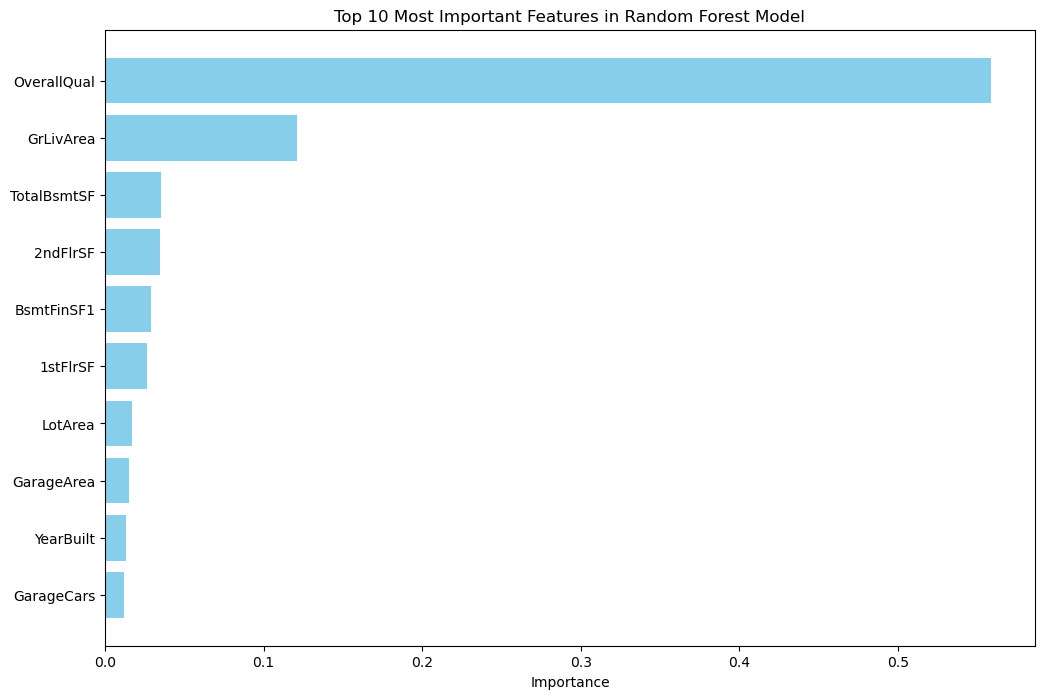

In [684]:
# Get feature importance from the Random Forest model
importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for easy visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Most Important Features in Random Forest Model')
plt.xlabel('Importance')
plt.show()

In [693]:
list(feature_importance_df['Feature'][:20])

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 '2ndFlrSF',
 'BsmtFinSF1',
 '1stFlrSF',
 'LotArea',
 'GarageArea',
 'YearBuilt',
 'GarageCars',
 'LotFrontage',
 'BsmtQual',
 'GarageYrBlt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'FullBath',
 'OpenPorchSF',
 'BsmtUnfSF',
 'WoodDeckSF',
 'KitchenQual']

In [685]:
important_features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'YearBuilt',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'GarageArea',
 'LotArea']

In [808]:
X_train[important_features].loc[0]

OverallQual       7
GrLivArea      1710
GarageCars        2
YearBuilt      2003
TotalBsmtSF     856
1stFlrSF        856
FullBath          2
GarageArea      548
LotArea        8450
Name: 0, dtype: int64

In [ ]:
# almost same imortant features we got from correlatoin matrix

In [827]:
from xgboost import XGBRegressor

# Instantiate the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model
xgb_model.fit(X_train[important_features], y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test[important_features])

# Evaluate the XGBoost model
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MSE: {xgb_mse:.2f}")
print(f"XGBoost R^2: {xgb_r2:.2f}")

# Save the trained model using joblib
joblib.dump(xgb_model, 'xgb_model.pkl')
print("Model saved as 'xgb_model.pkl'")

XGBoost MSE: 860808399.47
XGBoost R^2: 0.89
Model saved as 'xgb_model.pkl'


In [822]:
X_train[important_features].loc[0]

OverallQual       7
GrLivArea      1710
GarageCars        2
YearBuilt      2003
TotalBsmtSF     856
1stFlrSF        856
FullBath          2
GarageArea      548
LotArea        8450
Name: 0, dtype: int64

In [823]:
X_test[important_features].iloc[0]

OverallQual       6
GrLivArea      1068
GarageCars        1
YearBuilt      1963
TotalBsmtSF    1059
1stFlrSF       1068
FullBath          1
GarageArea      264
LotArea        8414
Name: 892, dtype: int64

In [826]:
xgb_model.predict(X_test[important_features].iloc[[0]])

array([135018.48], dtype=float32)

In [709]:
from xgboost import XGBRegressor

for n in range(1,len(top_10_correlated_with_SalePice)):
    importants = top_10_correlated_with_SalePice.index[:n]
    X_important_train = X_train[importants]
    X_important_test = X_test[importants]
    
    # Instantiate the XGBoost Regressor
    xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    
    # Fit the model
    xgb_model.fit(X_important_train, y_train)
    
    # Predict on the test set
    y_pred_xgb = xgb_model.predict(X_important_test)
    
    # Evaluate the XGBoost model
    xgb_mse = mean_squared_error(y_test, y_pred_xgb)
    xgb_r2 = r2_score(y_test, y_pred_xgb)
    
    # print(f"XGBoost MSE [n={n}]: {xgb_mse:.2f}")
    print(f"XGBoost R^2 [n={n}]: {xgb_r2:.2f}")

XGBoost R^2 [n=1]: 0.72
XGBoost R^2 [n=2]: 0.81
XGBoost R^2 [n=3]: 0.83
XGBoost R^2 [n=4]: 0.86
XGBoost R^2 [n=5]: 0.85
XGBoost R^2 [n=6]: 0.84
XGBoost R^2 [n=7]: 0.84
XGBoost R^2 [n=8]: 0.89
XGBoost R^2 [n=9]: 0.88
XGBoost R^2 [n=10]: 0.90
XGBoost R^2 [n=11]: 0.88
XGBoost R^2 [n=12]: 0.88
XGBoost R^2 [n=13]: 0.89
XGBoost R^2 [n=14]: 0.89
XGBoost R^2 [n=15]: 0.89
XGBoost R^2 [n=16]: 0.89
XGBoost R^2 [n=17]: 0.89
XGBoost R^2 [n=18]: 0.89
XGBoost R^2 [n=19]: 0.90
XGBoost R^2 [n=20]: 0.90
XGBoost R^2 [n=21]: 0.90
XGBoost R^2 [n=22]: 0.90
XGBoost R^2 [n=23]: 0.90
XGBoost R^2 [n=24]: 0.90
XGBoost R^2 [n=25]: 0.90
XGBoost R^2 [n=26]: 0.91
XGBoost R^2 [n=27]: 0.91
XGBoost R^2 [n=28]: 0.91
XGBoost R^2 [n=29]: 0.91
XGBoost R^2 [n=30]: 0.91
XGBoost R^2 [n=31]: 0.91
XGBoost R^2 [n=32]: 0.91
XGBoost R^2 [n=33]: 0.91
XGBoost R^2 [n=34]: 0.90
XGBoost R^2 [n=35]: 0.90


In [799]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

X_train = X_train.drop(columns=['SalePrice'])
# Define the model
xgb = XGBRegressor(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Set up the Grid Search with cross-validation
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and best model performance
best_params = grid_search.best_params_
best_mse = -grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best MSE from Grid Search: {best_mse:.2f}")

# Fit the best model with the optimal hyperparameters
best_xgb_model = XGBRegressor(**best_params, random_state=42)
best_xgb_model.fit(X_train, y_train)

# Evaluate the tuned model on the test set
y_pred_best = best_xgb_model.predict(X_test)
best_xgb_mse = mean_squared_error(y_test, y_pred_best)
best_xgb_r2 = r2_score(y_test, y_pred_best)

print(f"Tuned XGBoost MSE: {best_xgb_mse:.2f}")
print(f"Tuned XGBoost R^2: {best_xgb_r2:.2f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best MSE from Grid Search: 804883504.04


ValueError: feature_names mismatch: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'Functional', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'Alley_NoAlley', 'Alley_Pave', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'CentralAir_Y', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NoGarage', 'GarageFinish_NoGarage', 'GarageFinish_RFn', 'GarageFinish_Unf', 'MiscFeature_None', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside'] ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'Functional', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'Alley_NoAlley', 'Alley_Pave', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'CentralAir_Y', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NoGarage', 'GarageFinish_NoGarage', 'GarageFinish_RFn', 'GarageFinish_Unf', 'MiscFeature_None', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'SalePrice']
training data did not have the following fields: SalePrice

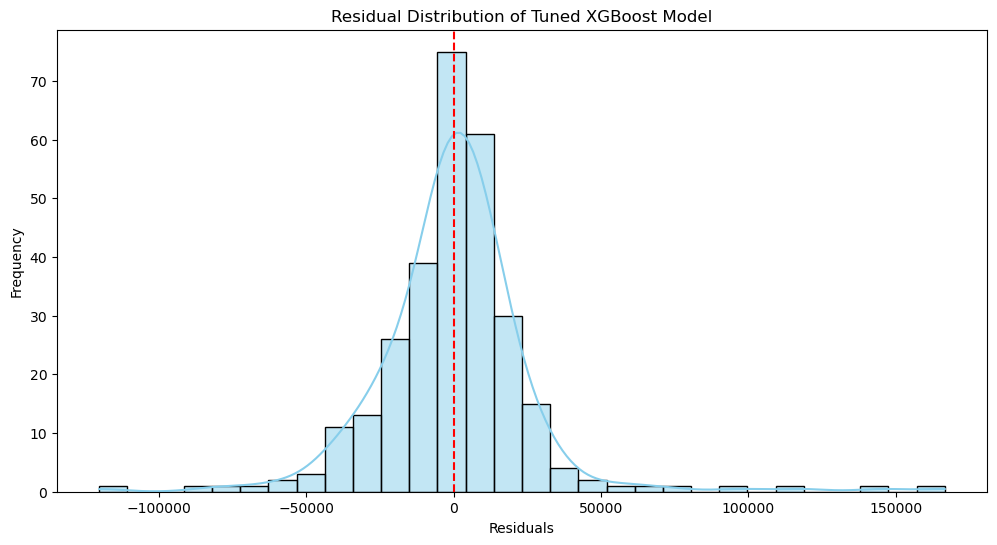

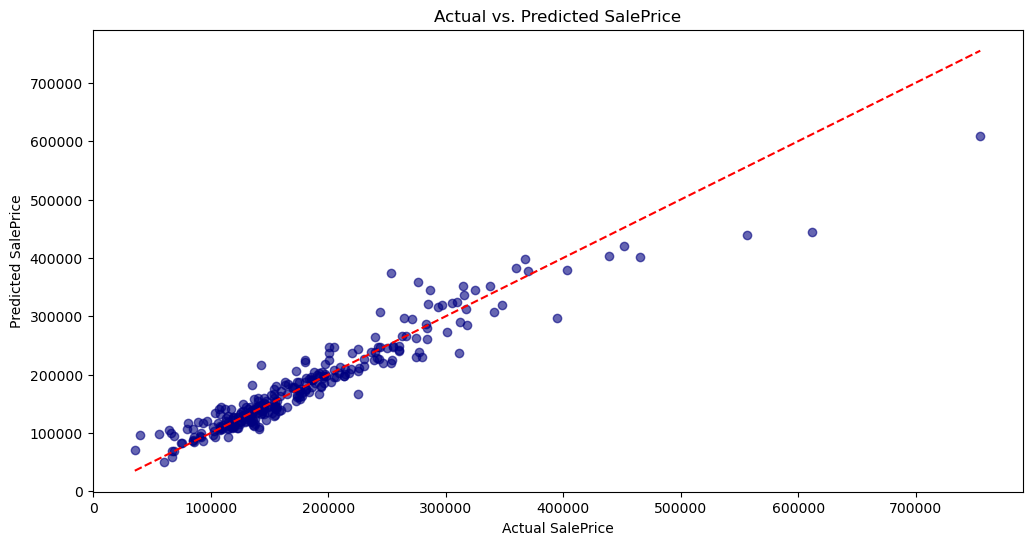

In [713]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred_best

# Plot residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals, bins=30, kde=True, color='skyblue')
plt.title('Residual Distribution of Tuned XGBoost Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')
plt.show()

# Scatter plot of actual vs. predicted
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='navy')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs. Predicted SalePrice')
plt.show()

In [720]:
# Combine X_train and y_train to identify and remove outliers based on SalePrice
X_train['SalePrice'] = y_train  # Add the target variable to the training data

# Use IQR method to detect high outliers in SalePrice
Q1 = X_train['SalePrice'].quantile(0.25)
IQR = Q3 - Q1

# Define the upper bound as Q3 + 1.5 * IQR (adjust if necessary)
upper_bound = Q3 +  2*IQR

# Filter out high outliers from the training data
X_train_cleaned = X_train[X_train['SalePrice'] <= upper_bound]

# Separate the cleaned X_train and y_train after removing outliers
y_train_cleaned = X_train_cleaned['SalePrice']
X_train_cleaned = X_train_cleaned.drop(['SalePrice'], axis=1)

print(f"Training data shape after removing outliers: {X_train_cleaned.shape}")

# Repeat the process for the test set
X_test['SalePrice'] = y_test  # Add the target variable to the test data

# Filter out high outliers from the test data using the same upper bound
X_test_cleaned = X_test[X_test['SalePrice'] <= upper_bound]

# Separate the cleaned X_test and y_test after removing outliers
y_test_cleaned = X_test_cleaned['SalePrice']
X_test_cleaned = X_test_cleaned.drop(['SalePrice'], axis=1)

print(f"Test data shape after removing outliers: {X_test_cleaned.shape}")

Training data shape after removing outliers: (1139, 204)
Test data shape after removing outliers: (284, 204)


In [787]:
# Combine X_train and y_train to identify and remove outliers based on SalePrice
X_train['SalePrice'] = y_train  # Add the target variable to the training data

# Calculate mean and standard deviation of SalePrice in the training set
mean_price = X_train['SalePrice'].median()
std_price = X_train['SalePrice'].std()

# Define the upper threshold as mean + 2 * std
upper_threshold = 500000
lower_threshold = 100000

# Filter out rows with SalePrice above the threshold in the training data
X_train_cleaned = X_train[(X_train['SalePrice'] <= upper_threshold)&(X_train['SalePrice'] >= lower_threshold)]

# Separate the cleaned X_train and y_train after removing outliers
y_train_cleaned = X_train_cleaned['SalePrice']
X_train_cleaned = X_train_cleaned.drop(['SalePrice'], axis=1)

print(f"Training data shape after removing high price outliers: {X_train_cleaned.shape}")

# Repeat the process for the test set
X_test['SalePrice'] = y_test  # Add the target variable to the test data

# Filter out rows with SalePrice above the threshold in the test data
X_test_cleaned = X_test[X_test['SalePrice'] <= upper_threshold]

# Separate the cleaned X_test and y_test after removing outliers
y_test_cleaned = X_test_cleaned['SalePrice']
X_test_cleaned = X_test_cleaned.drop(['SalePrice'], axis=1)

print(f"Test data shape after removing high price outliers: {X_test_cleaned.shape}")

Training data shape after removing high price outliers: (1074, 204)
Test data shape after removing high price outliers: (289, 204)


In [788]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor


# Define the model
xgb = XGBRegressor(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Set up the Grid Search with cross-validation
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the Grid Search to the training data
grid_search.fit(X_train_cleaned, y_train_cleaned)

# Retrieve the best parameters and best model performance
best_params = grid_search.best_params_
best_mse = -grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best MSE from Grid Search: {best_mse:.2f}")

# Fit the best model with the optimal hyperparameters
best_xgb_model = XGBRegressor(**best_params, random_state=42)
best_xgb_model.fit(X_train_cleaned, y_train_cleaned)

# Evaluate the tuned model on the test set
y_pred_best = best_xgb_model.predict(X_test_cleaned)
best_xgb_mse = mean_squared_error(y_test_cleaned, y_pred_best)
best_xgb_r2 = r2_score(y_test_cleaned, y_pred_best)

print(f"Tuned XGBoost MSE: {best_xgb_mse:.2f}")
print(f"Tuned XGBoost R^2: {best_xgb_r2:.2f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best MSE from Grid Search: 542986263.06
Tuned XGBoost MSE: 532176188.59
Tuned XGBoost R^2: 0.90


In [800]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Best parameters from your Grid Search
best_params = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.2,
    'max_depth': 7,
    'n_estimators': 50,
    'subsample': 1.0,
    'random_state': 42
}

# Instantiate the XGBoost model with the best parameters
xgb_model = XGBRegressor(**best_params)

# Train the model on the cleaned training data
xgb_model.fit(X_train_cleaned, y_train_cleaned)

# Predict on the test set to evaluate performance
y_pred = xgb_model.predict(X_test_cleaned)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_cleaned, y_pred)
r2 = r2_score(y_test_cleaned, y_pred)

print(f"Tuned XGBoost MSE: {mse:.2f}")
print(f"Tuned XGBoost R^2: {r2:.2f}")

# Save the trained model using joblib
joblib.dump(xgb_model, 'xgb_model.pkl')
print("Model saved as 'xgb_model.pkl'")

Tuned XGBoost MSE: 780769203.29
Tuned XGBoost R^2: 0.86
Model saved as 'xgb_model.pkl'


In [829]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import StandardScaler
import joblib
import numpy as np

# Define important features
important_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt', 'TotalBsmtSF', 
                      '1stFlrSF', 'FullBath', 'GarageArea', 'LotArea']

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[important_features])
X_test_scaled = scaler.transform(X_test[important_features])

# Define the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metrics
scorers = {
    'mse': make_scorer(mean_squared_error, greater_is_better=False),
    'r2': make_scorer(r2_score)
}

# Set up the Grid Search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=scorers,
    refit='mse',  # Refit the model using the best MSE score
    cv=kf,
    verbose=2,
    n_jobs=-1
)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Display the best parameters and scores
best_params = grid_search.best_params_
best_mse = -grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best MSE from Grid Search: {best_mse:.2f}")

# Train the model with the best parameters on the entire training set
best_xgb_model = XGBRegressor(**best_params, random_state=42)
best_xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = best_xgb_model.predict(X_test_scaled)

# Evaluate the model on the test set
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print(f"Tuned XGBoost Test MSE: {xgb_mse:.2f}")
print(f"Tuned XGBoost Test R²: {xgb_r2:.2f}")

# Save the trained model using joblib
joblib.dump(best_xgb_model, 'xgb_model.pkl')
print("Model saved as 'xgb_model.pkl'")



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Best MSE from Grid Search: 995205594.35
Tuned XGBoost Test MSE: 914554222.17
Tuned XGBoost Test R²: 0.88
Model saved as 'xgb_model.pkl'
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total ti

In [ ]:
914554222.17

# Appendix A

In [336]:
# lets find the mode type of each neighborhood
for col in df['Neighborhood'].unique():
    mode=df[(df['Neighborhood']==col)&(df['MasVnrType']!='None')]['MasVnrType'].mode()
    if not mode.empty:
        print(f'mode MasVnrTpe in {col} is {mode[0]}')
    else: print(f'no mode MasVnrTpe in {col}')

mode MasVnrTpe in CollgCr is BrkFace
mode MasVnrTpe in Veenker is BrkFace
mode MasVnrTpe in Crawfor is BrkFace
mode MasVnrTpe in NoRidge is BrkFace
mode MasVnrTpe in Mitchel is BrkFace
mode MasVnrTpe in Somerst is Stone
mode MasVnrTpe in NWAmes is BrkFace
mode MasVnrTpe in OldTown is BrkFace
mode MasVnrTpe in BrkSide is BrkFace
mode MasVnrTpe in Sawyer is BrkFace
mode MasVnrTpe in NridgHt is Stone
mode MasVnrTpe in NAmes is BrkFace
mode MasVnrTpe in SawyerW is BrkFace
mode MasVnrTpe in IDOTRR is BrkFace
mode MasVnrTpe in MeadowV is BrkFace
mode MasVnrTpe in Edwards is BrkFace
mode MasVnrTpe in Timber is BrkFace
mode MasVnrTpe in Gilbert is BrkFace
mode MasVnrTpe in StoneBr is Stone
mode MasVnrTpe in ClearCr is BrkFace
no mode MasVnrTpe in NPkVill
mode MasVnrTpe in Blmngtn is BrkFace
mode MasVnrTpe in BrDale is BrkFace
mode MasVnrTpe in SWISU is BrkFace
no mode MasVnrTpe in Blueste


In [348]:
df[(df['MasVnrArea'].isna() ) & (df['MasVnrType']!='None')][['MasVnrType','MasVnrArea','Neighborhood']]

,MasVnrType,MasVnrArea,Neighborhood
234,BrkFace,NaN,Gilbert
529,BrkFace,NaN,Crawfor
650,BrkFace,NaN,Somerst
936,BrkFace,NaN,SawyerW
973,BrkFace,NaN,Somerst
977,BrkFace,NaN,Somerst
1243,BrkFace,NaN,NridgHt
1278,BrkFace,NaN,CollgCr


In [471]:
# sns heat map

In [ ]:
# Step 1: Handle numerical columns (use as is)
df_numerical = df[numerical_cols].copy()

# Step 2: Encode ordinal categorical columns
ordinal_encoder = OrdinalEncoder()
df_ordinal = df[ordinal_cols].copy()
df_ordinal_encoded = pd.DataFrame(ordinal_encoder.fit_transform(df_ordinal), columns=ordinal_cols)

# Step 3: One-hot encode nominal categorical columns
df_nominal = df[nominal_cols].copy()
df_nominal_encoded = pd.get_dummies(df_nominal, drop_first=True)

# Step 4: Combine all processed columns
df_encoded = pd.concat([df_numerical, df_ordinal_encoded, df_nominal_encoded], axis=1)

# Step 5: Compute the correlation matrix using Spearman correlation
corr_matrix = df_encoded.corr(method='spearman')

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .8})

plt.title('Lower Triangle Correlation Matrix')
plt.show()